In [1]:
# from folium.plugins import MeasureControl
# from os import listdir
# from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon
# from shapely.ops import unary_union
# import codecs
# import json
from branca.element import Template, MacroElement
from folium import plugins
from folium.plugins import TimestampedGeoJson
from folium.plugins import Draw
from folium import IFrame
import ast
import folium
import geopandas as gpd
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def CreatesMap():
    mymap = folium.Map(
        location=[48,36.00],
        zoom_start=6,
        control_scale = True,
        tiles="openstreetmap")
    return mymap

In [3]:
def Timestam_GeoJson(features,mymap):
    TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
    period='P1D',
    duration='PT12H',
    auto_play=False,
    add_last_point=True,
    min_speed=0.1,
    max_speed=.5,
    loop=False,
    loop_button=True,
    date_options='YYYY/MM/DD'
    ).add_to(mymap)
    return mymap

In [33]:
url = 'https://raw.githubusercontent.com/JimmyNunnally/unit_dashboard/main/unit_start_v2.csv'
unit_points = pd.read_csv(url)


In [5]:
unit_points['popup'] = "<a href=" + unit_points['media'] + " target='_blank'><img src=" + unit_points['media'] + " title='" + (unit_points['firepower'].astype(str)) + "' width='300' height='150'/><br>" + unit_points['firepower'].astype(str) + " </a><br><a href=" + unit_points['source'] + " target='blank'><p align='right'>Source</p></a>"

In [6]:
def XPTO(df, cols, features):
    # creating dict from each row of the dataframe
    for i, row in df.iterrows():
        # Base of the geoson feature
        media = {'type':'Feature','properties':{},'geometry':{'type':'Point','coordinates':[]}}
        # coordinates to POINT
        media['geometry']['coordinates'] = [row['lon'],row['lat']]
        # Define the type of icon
        media['properties']['icon'] = 'marker'
        # Time Range
        media['properties']['times'] = [row['start'],row['end']]
        # Styling the icon
        media['properties']['iconstyle'] = {}

        for prop in cols:
            # Creating properties
            media['properties'][prop] = row[prop]

            for icost in prop:
                # iconUrl
                media['properties']['iconstyle']['iconUrl'] = row['iconUrl']
                # icon Size
                media['properties']['iconstyle']['iconSize'] = [45,45]
                # shadow Url
                media['properties']['iconstyle']['shadowUrl'] = 'https://i.ibb.co/7z6p6z5/shadow.png'
                # shadow Size
                media['properties']['iconstyle']['shadowSize'] = [85,45]
                # icon Anchor
                media['properties']['iconstyle']['iconAnchor'] = [25,45]
                # shadow Anchor
                media['properties']['iconstyle']['shadowAnchor'] = [45,45]

        # appending
        features.append(media)
    return features

In [7]:
# Columns to use on properties
cols = unit_points[['region', 'firepower','popup']]
features_2 = XPTO(unit_points, cols, [])

## Dashboard Demo

In [8]:
mymap=Timestam_GeoJson(features_2,CreatesMap())

In [9]:
#cofm
bluefp=sum(unit_points['firepower'][0:5])
redfp=sum(unit_points['firepower'][6:10])
cofm=bluefp/redfp
cofm

0.952012690858616

In [10]:
#Unit supply graphs
#Class 3,5,7,8
#Percent over time



text = 'The COFM for this AO is '+ str(cofm)

iframe = folium.IFrame(text, width=200, height=100)
popup = folium.Popup(iframe, max_width=3000)

Text = folium.Marker(location=[48,36], popup=popup,
                     icon=folium.Icon(icon_color='green'))
mymap.add_child(Text)

Draw(
    export=True,
    filename="my_data.geojson",
    position="topleft",
    draw_options={"polyline": {"allowIntersection": False}},
    edit_options={"poly": {"allowIntersection": False}},
).add_to(mymap)


folium.TileLayer('stamenterrain', overlay=False).add_to(mymap)
folium.TileLayer('cartodbpositron', overlay=False).add_to(mymap)

folium.features.ClickForLatLng(format_str=None, alert=True).add_to(mymap)


fg = folium.FeatureGroup(name="All sections")
mymap.add_child(fg)
g1 = plugins.FeatureGroupSubGroup(fg, "MC")
mymap.add_child(g1)

g2 = plugins.FeatureGroupSubGroup(fg, "Fires")
mymap.add_child(g2)

g3 = plugins.FeatureGroupSubGroup(fg, "M&M")
mymap.add_child(g3)

g4 = plugins.FeatureGroupSubGroup(fg, "Intel")
mymap.add_child(g4)

g5 = plugins.FeatureGroupSubGroup(fg, "Protection")
mymap.add_child(g5)

g6 = plugins.FeatureGroupSubGroup(fg, "Sustainment")
mymap.add_child(g6)


#folium.Marker([-1, -1]).add_to(g1)
#folium.Marker([1, 1]).add_to(g1)

#folium.Marker([-1, 1]).add_to(g2)
#folium.Marker([1, -1]).add_to(g2)



#minimap = plugins.MiniMap()
#mymap.add_child(minimap)

folium.LayerControl(collapsed=True).add_to(mymap)





mymap

In [29]:
#num=np.random.randint(0,1000,size=(4,1))
num = random.sample(range(0,100), 4)

[100, [29, 34, 17]]

In [15]:
begin_date = '2023-02-14'
CL3 = pd.DataFrame({'Quantity':random.sample(range(0,100), 4),
                   'Date':pd.date_range(begin_date, periods=len(num))})
CL3=CL3.set_index('Date')

CL5 = pd.DataFrame({'Quantity':random.sample(range(0,100), 4),
                   'Date':pd.date_range(begin_date, periods=len(num))})
CL5=CL5.set_index('Date')

CL7 = pd.DataFrame({'Quantity':random.sample(range(0,100), 4),
                   'Date':pd.date_range(begin_date, periods=len(num))})
CL7=CL7.set_index('Date')

Personel = pd.DataFrame({'Quantity':random.sample(range(0,100), 4),
                   'Date':pd.date_range(begin_date, periods=len(num))})
Personel=Personel.set_index('Date')


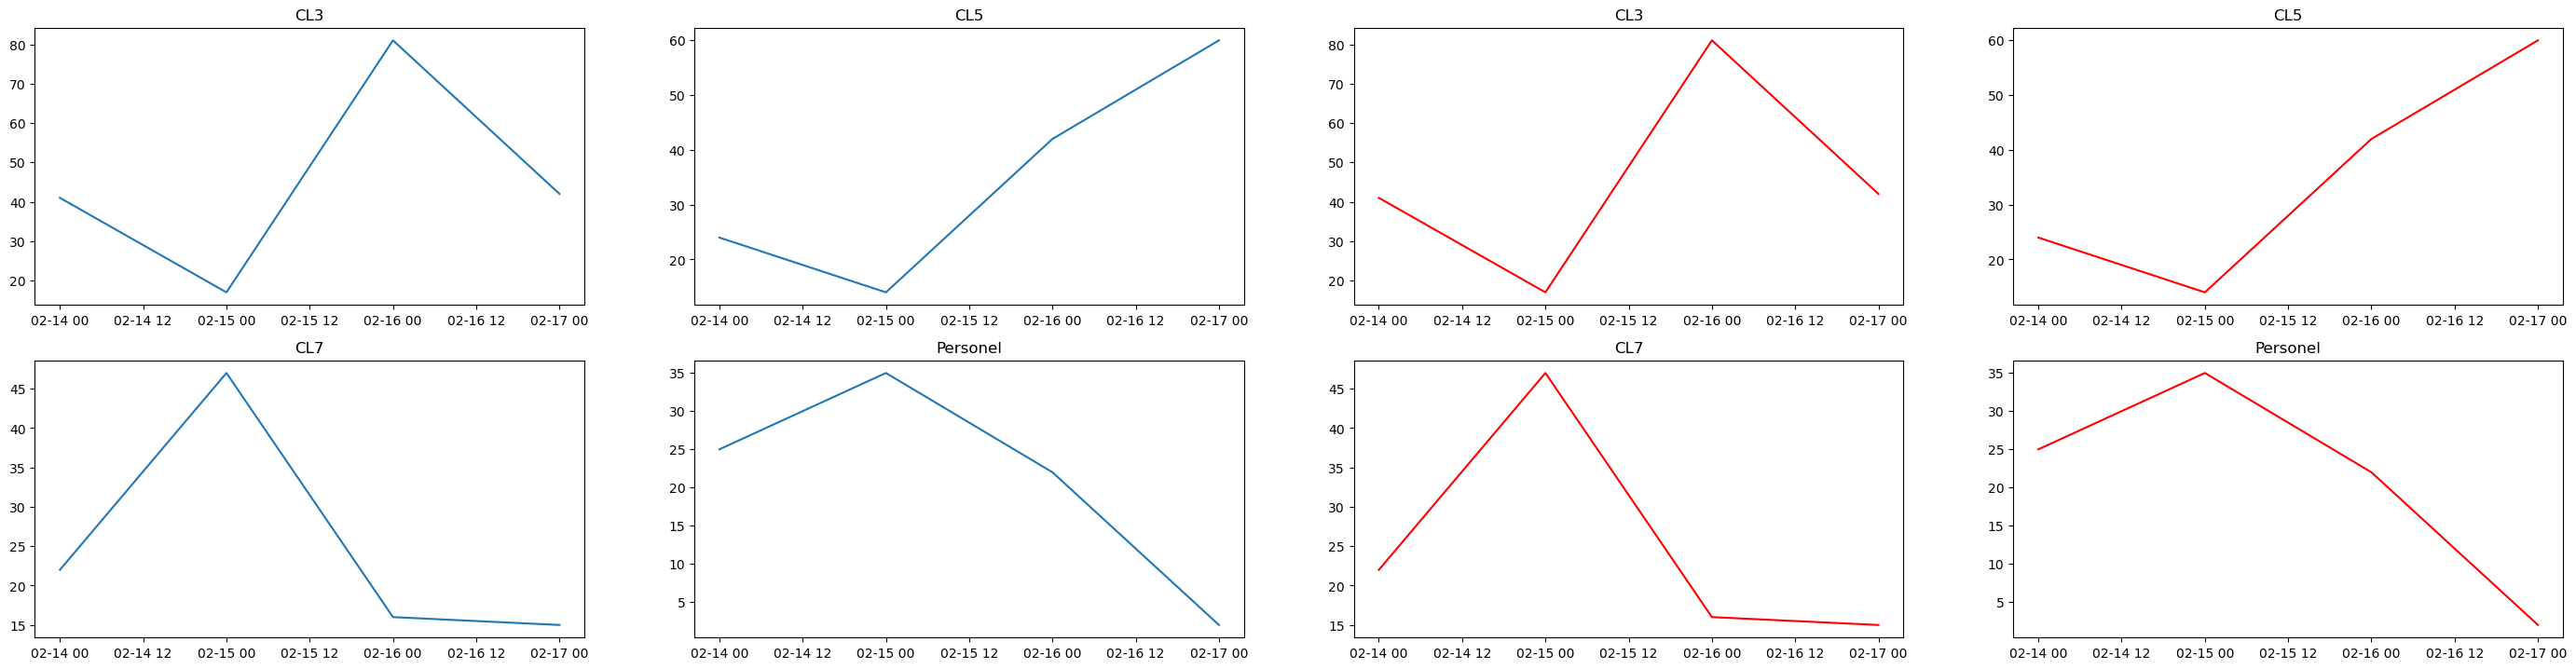

In [30]:
figure, axis = plt.subplots(2, 4)

axis[0, 0].plot(CL3)
axis[0, 0].set_title("CL3")
  

axis[0, 1].plot(CL5)
axis[0, 1].set_title("CL5")
  

axis[1, 0].plot(CL7)
axis[1, 0].set_title("CL7")
  

axis[1, 1].plot(Personel)
axis[1, 1].set_title("Personel")


axis[0, 2].plot(CL3,color='r')
axis[0, 2].set_title("CL3")

axis[0, 3].plot(CL5,color='r')
axis[0, 3].set_title("CL5")

axis[1, 2].plot(CL7,color='r')
axis[1, 2].set_title("CL7")


axis[1, 3].plot(Personel,color='r')
axis[1, 3].set_title("Personel")

#Make fullscreen
figure.set_size_inches(35, 8.5)

# Combine all the operations and display

plt.show()